In [1]:
# Import Tools and Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
csv_path = "datasets/Agora_fixed.csv"

# Create Dataframes

In [2]:
# All Darknet Transactions
dirty_df = pd.read_csv(csv_path, encoding = "utf-8")
# All Drug Transactions
drugs_df = dirty_df[dirty_df[" Category"].str.contains("Drugs")]

## What Kind of Stuff is Sold on the Darknet?

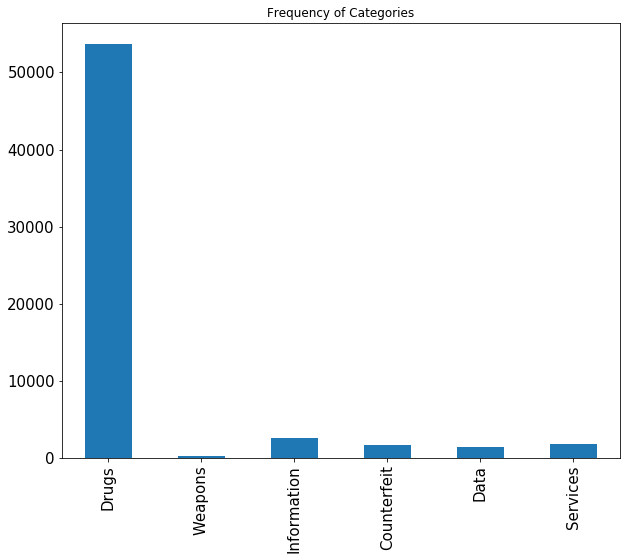

In [11]:

#Filter by Categories
category_df = dirty_df.groupby(" Category").filter(lambda x: len(x) > 100)[" Category"]

#Get the count of each category
drugCount = category_df.str.contains("Drugs").sum()
weaponCount = category_df.str.contains("Weapons").sum()
infoCount = category_df.str.contains("Info").sum()
counterFeitCount = category_df.str.contains("Counterfeit").sum()
dataCount = category_df.str.contains("Data").sum()
serviceCount = category_df.str.contains("Service").sum()

category_counts_dict = {
    "Drugs" : drugCount,
    "Weapons" : weaponCount,
    "Information" : infoCount,
    "Counterfeit" : counterFeitCount,
    "Data" : dataCount,
    "Services" : serviceCount
}
category_counts = pd.DataFrame.from_dict(category_counts_dict, orient = "index")[0]
category_counts.plot(kind="bar", figsize = (10,8), title="Frequency of Categories", fontsize=15)

##### As you can see, Drugs take up the majority of darknet sales. This is likely because there is a tremendous supply and demand of drugs compared to the other categories. Not to mention, it's also a lot easier to send over a package of drugs, compared to a weapon.

## Where do the drugs come from?

(array([  4714.,      0.,      0.,      0.,   2831.,      0.,      0.,
             0.,   2289.,      0.,      0.,      0.,   2560.,      0.,
             0.,      0.,    468.,      0.,      0.,      0.,   4347.,
             0.,      0.,      0.,    882.,      0.,      0.,      0.,
          4760.,      0.,      0.,      0.,    786.,      0.,      0.,
             0.,   5379.,      0.,      0.,  16593.]),
 array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
          2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
          4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
          6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
          8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ]),
 <a list of 40 Patch objects>)

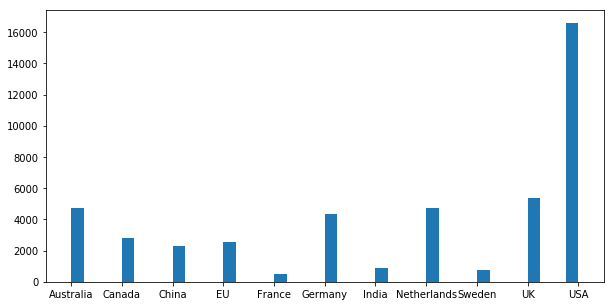

In [4]:
drugs_by_location = drugs_df[drugs_df[" Origin"] != "World"]
drugs_by_location = drugs_by_location.groupby(" Origin").filter(lambda x: len(x) > 300)[" Origin"]
plt.figure(figsize=(10, 5))
plt.hist(drugs_by_location, bins = 40)

##### These are the top 11 countries that sell drugs on the darknet. Unsurprisingly, the USA sells the most out of all countries. Though mind you, the USA has a population of over 300 million people. Netherlands on the otherhand only has 17 million people, yet sells over a fifth of what USA sells.

## Just Cannabis?

(array([  926.,     0.,     0.,     0.,     0.,  1285.,     0.,     0.,
            0.,     0.,   317.,     0.,     0.,     0.,     0.,   742.,
            0.,     0.,     0.,     0.,  1321.,     0.,     0.,     0.,
            0.,   923.,     0.,     0.,     0.,     0.,   214.,     0.,
            0.,     0.,     0.,  1482.,     0.,     0.,     0.,  7546.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ]),
 <a list of 40 Patch objects>)

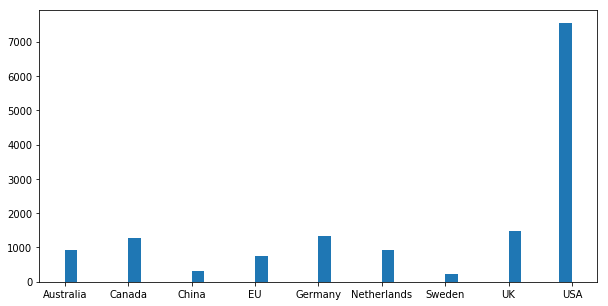

In [5]:
weed_by_location = drugs_df[drugs_df[" Origin"] != "World"]
weed_by_location = weed_by_location[weed_by_location[" Category"].str.contains("Cannabis")]
weed_by_location = weed_by_location.groupby(" Origin").filter(lambda x: len(x) > 200)[" Origin"]
plt.figure(figsize=(10, 5))
plt.hist(weed_by_location, bins = 40)

##### USA likes their weed.

## Psychedelics?

(array([  454.,     0.,     0.,     0.,     0.,   260.,     0.,     0.,
            0.,     0.,     0.,   303.,     0.,     0.,     0.,     0.,
            0.,   335.,     0.,     0.,     0.,     0.,   302.,     0.,
            0.,     0.,     0.,     0.,   476.,     0.,     0.,     0.,
            0.,     0.,   458.,     0.,     0.,     0.,     0.,  1270.]),
 array([ 0.   ,  0.175,  0.35 ,  0.525,  0.7  ,  0.875,  1.05 ,  1.225,
         1.4  ,  1.575,  1.75 ,  1.925,  2.1  ,  2.275,  2.45 ,  2.625,
         2.8  ,  2.975,  3.15 ,  3.325,  3.5  ,  3.675,  3.85 ,  4.025,
         4.2  ,  4.375,  4.55 ,  4.725,  4.9  ,  5.075,  5.25 ,  5.425,
         5.6  ,  5.775,  5.95 ,  6.125,  6.3  ,  6.475,  6.65 ,  6.825,  7.   ]),
 <a list of 40 Patch objects>)

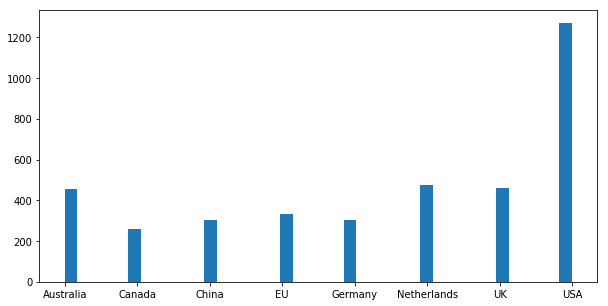

In [6]:
psyche_by_location = drugs_df[drugs_df[" Origin"] != "World"]
psyche_by_location = psyche_by_location[psyche_by_location[" Category"].str.contains("Psychedelics")]
psyche_by_location = psyche_by_location.groupby(" Origin").filter(lambda x: len(x) > 100)[" Origin"]
plt.figure(figsize=(10, 5))
plt.hist(psyche_by_location, bins = 40)

##### Netherlands sells about 1/3 of what USA does when it comes to psychedelics.

## Stimulants?

(array([  881.,     0.,     0.,     0.,     0.,   293.,     0.,     0.,
            0.,     0.,    94.,     0.,     0.,     0.,     0.,   201.,
            0.,     0.,     0.,     0.,    79.,     0.,     0.,     0.,
            0.,   682.,     0.,     0.,     0.,     0.,   813.,     0.,
            0.,     0.,     0.,   806.,     0.,     0.,     0.,  1651.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ]),
 <a list of 40 Patch objects>)

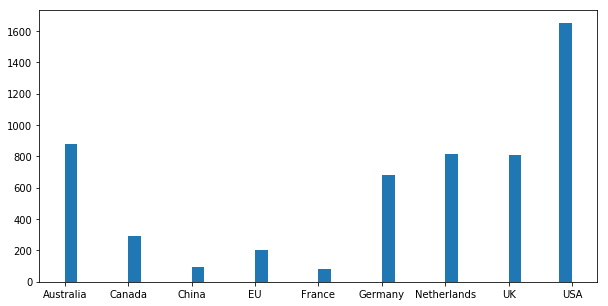

In [7]:
stim_by_location = drugs_df[drugs_df[" Origin"] != "World"]
stim_by_location = stim_by_location[stim_by_location[" Category"].str.contains("Stimulants")]
stim_by_location = stim_by_location.groupby(" Origin").filter(lambda x: len(x) > 75)[" Origin"]
plt.figure(figsize=(10, 5))
plt.hist(stim_by_location, bins = 40)

##### Netherlands at 1/2 USA stimulants sales. Australia ( 25 million people ) sells even more than that!

## Let's factor in Population

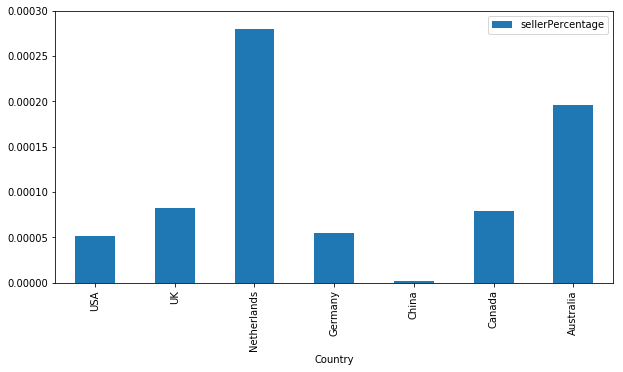

In [8]:
population_by_country_dict = {
    "USA" : 320000000,
    "UK" : 65000000,
    "Netherlands" : 17000000,
    "Germany" : 80000000, 
    "China" : 1300000000,
    "Canada" : 36000000,
    "Australia" : 24000000
}
population_by_country = pd.DataFrame(columns=["Country", "Population", "DrugCount", "sellerPercentage"])
population_by_country["Country"] = population_by_country_dict.keys()
population_by_country["Population"] = population_by_country_dict.values()
for i, key in enumerate(population_by_country_dict.keys()):
    population_by_country.loc[i, "DrugCount"] = drugs_by_location[drugs_by_location == key].count()
for i, key in enumerate(population_by_country_dict.keys()):
    population_by_country.loc[i, "sellerPercentage"] = population_by_country.loc[i][2] / population_by_country.loc[i][1]
population_by_country.plot(x="Country", y="sellerPercentage", figsize = (10, 5), ylim = (0, 0.00030), kind="bar")

##### According to this dataset, a person in netherlands is 5 times as likely to sell drugs than USA. Australia at 4 times. Pretty crazy for a countries that aren't even 1% of the population of the USA.

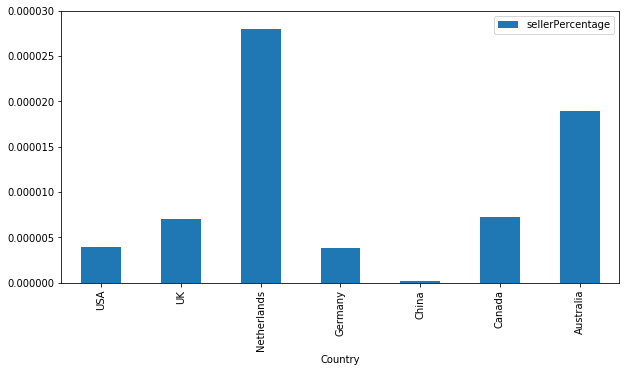

In [9]:
psyche_population_by_country = pd.DataFrame(columns=["Country", "Population", "DrugCount", "sellerPercentage"])
psyche_population_by_country["Country"] = population_by_country_dict.keys()
psyche_population_by_country["Population"] = population_by_country_dict.values()
for i, key in enumerate(population_by_country_dict.keys()):
    psyche_population_by_country.loc[i, "DrugCount"] = psyche_by_location[psyche_by_location == key].count()
for i, key in enumerate(population_by_country_dict.keys()):
    psyche_population_by_country.loc[i, "sellerPercentage"] = psyche_population_by_country.loc[i][2] / psyche_population_by_country.loc[i][1]

psyche_population_by_country.plot(x="Country", y="sellerPercentage", figsize = (10, 5), ylim = (0, 0.00003), kind="bar")

##### Netherlands 7 times more as likely to sell Psychedelics than USA.

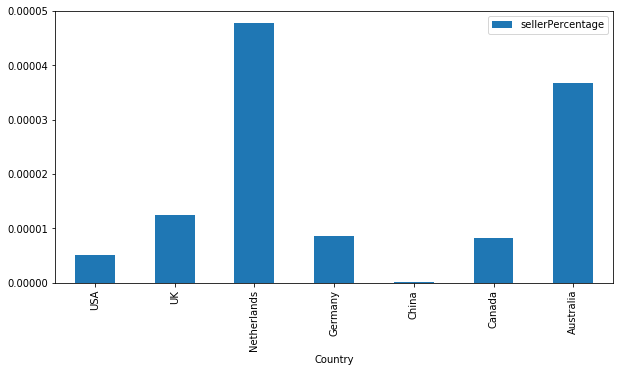

In [10]:
stim_population_by_country = pd.DataFrame(columns=["Country", "Population", "DrugCount", "sellerPercentage"])
stim_population_by_country["Country"] = population_by_country_dict.keys()
stim_population_by_country["Population"] = population_by_country_dict.values()
for i, key in enumerate(population_by_country_dict.keys()):
    stim_population_by_country.loc[i, "DrugCount"] = stim_by_location[stim_by_location == key].count()
for i, key in enumerate(population_by_country_dict.keys()):
    stim_population_by_country.loc[i, "sellerPercentage"] = stim_population_by_country.loc[i][2] / stim_population_by_country.loc[i][1]

stim_population_by_country.plot(x="Country", y="sellerPercentage", figsize = (10, 5), ylim = (0, 0.00005), kind="bar")

##### Netherlands 10 times as likely to sell stimulants than USA! 

# Conclusions

### 1. The Darknet is mostly just drugs.
### 2. USA Sells the most drugs.
### 3. Netherlands sells the most drugs per capita.
### 4. Dutch people are insane.